<a href="https://colab.research.google.com/github/Souguiroumaima7/facial-recognition-system/blob/main/recommander_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.html.widgets import *
sns.set_style('white') 

/usr/local/lib/python3.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [ ]:
movies = pd.read_csv("movies.csv")

In [ ]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
movies['movieId'].unique

<bound method Series.unique of 0            1
1            2
2            3
3            4
4            5
         ...  
9737    193581
9738    193583
9739    193585
9740    193587
9741    193609
Name: movieId, Length: 9742, dtype: int64>

EDA : 

In [ ]:
movies.groupby('title')['movieId'].mean().sort_values(ascending = False).head()

title
Andrew Dice Clay: Dice Rules (1991)          193609.0
Bungo Stray Dogs: Dead Apple (2018)          193587.0
Flint (2017)                                 193585.0
No Game No Life: Zero (2017)                 193583.0
Black Butler: Book of the Atlantic (2017)    193581.0
Name: movieId, dtype: float64

In [ ]:
movies.groupby('title')['movieId'].count().sort_values(ascending = False).head()

title
Confessions of a Dangerous Mind (2002)    2
Saturn 3 (1980)                           2
Emma (1996)                               2
Eros (2004)                               2
War of the Worlds (2005)                  2
Name: movieId, dtype: int64

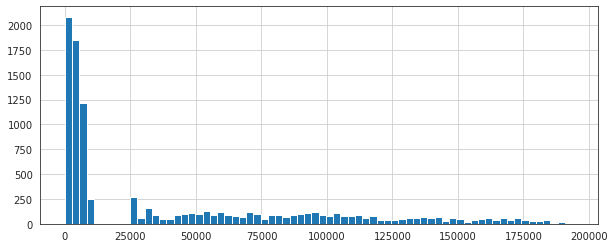

In [ ]:
plt.figure(figsize = (10,4))
movies['movieId'].hist(bins = 70)

In [ ]:
cols= list(movies.columns)
print(cols)

['movieId', 'title', 'genres']


In [13]:
movies = movies.sort_values('title', ascending=False)

In [15]:
movies.head()

,movieId,title,genres
3947,5560,À nous la liberté (Freedom for Us) (1931),Comedy|Musical
1866,2478,¡Three Amigos! (1986),Comedy|Western
5882,33158,xXx: State of the Union (2005),Action|Crime|Thriller
3920,5507,xXx (2002),Action|Crime|Thriller
1961,2600,eXistenZ (1999),Action|Sci-Fi|Thriller


Text(0.5, 1.0, 'Top Ten Movies')

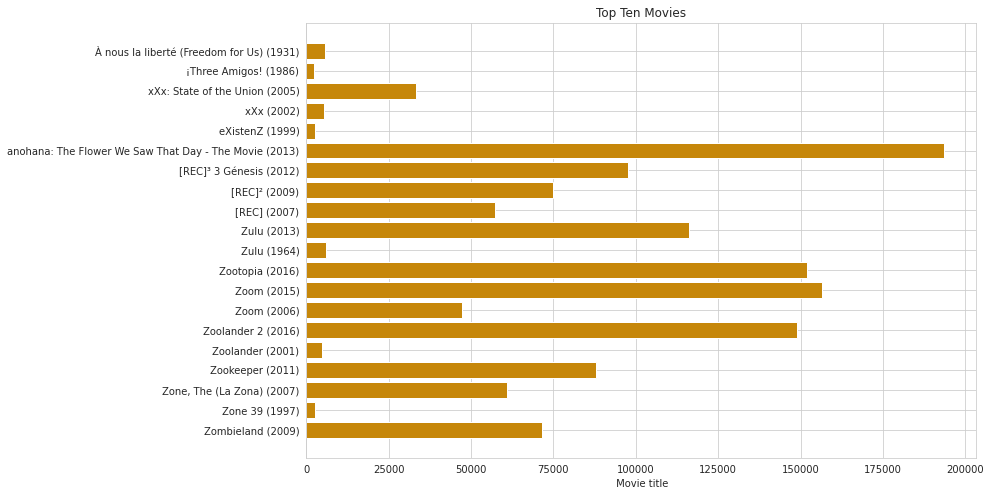

In [45]:
topten_scores=m_movies['movieId'].head(20) 
#get the titles 
topten_titles=m_movies['title'].head(20) 
#plot the top twenty movies 
import seaborn as sb
sb.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.barh(topten_titles,topten_scores, align='center',color='#C6870A')
plt.gca().invert_yaxis()
plt.xlabel(" Movie title")
plt.title("Top Ten Movies")

In [24]:
plots= movies['title']
plots.head(10)
plots.tail(10)

5122             *batteries not included (1987)
7075                (500) Days of Summer (2009)
2353                       'night Mother (1986)
1537                         'burbs, The (1989)
9183            'Tis the Season for Love (2015)
614                   'Til There Was You (1997)
5690                        'Salem's Lot (2004)
5528                     'Round Midnight (1986)
8014    'Hellboy': The Seeds of Creation (2004)
8600                                 '71 (2014)
Name: title, dtype: object

In [25]:
plots.shape

(9742,)

In [27]:
plots=plots[:10000]
plots.shape

(9742,)

In [28]:
#import TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words. 
tfidf = TfidfVectorizer(stop_words='english')

#Imute NaN with an empty string
plots =plots.fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(plots)

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(9742, 9053)

In [29]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cos_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
#show the shape of cos_sim matrix 
cos_sim.shape

(9742, 9742)

In [30]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movies[:20000].index, index=movies['title'][:20000]).drop_duplicates()
#show the some indices 
indices[:10]

title
À nous la liberté (Freedom for Us) (1931)                 3947
¡Three Amigos! (1986)                                     1866
xXx: State of the Union (2005)                            5882
xXx (2002)                                                3920
eXistenZ (1999)                                           1961
anohana: The Flower We Saw That Day - The Movie (2013)    9733
[REC]³ 3 Génesis (2012)                                   8009
[REC]² (2009)                                             7276
[REC] (2007)                                              6662
Zulu (2013)                                               8559
dtype: int64

In [31]:
def get_recommendations(title, cos_sim=cos_sim):
    # Get the index of the movie that matches the title
    index = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cos_sim[index]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['title'].iloc[movieId]

In [18]:
for i in df_result['title']:
    print(i)

Streaming output truncated to the last 5000 lines.
Lee Daniels' The Butler (2013)
Ledge, The (2011)
Leaving Las Vegas (1995)
Leaves of Grass (2009)
Leave It to Beaver (1997)
Leatherheads (2008)
Leap of Faith (1992)
Leap Year (2010)
Lean on Me (1989)
League of Their Own, A (1992)
League of Ordinary Gentlemen, A (2004)
League of Extraordinary Gentlemen, The (a.k.a. LXG) (2003)
Le Maître d'école (1981)
Layer Cake (2004)
Laws of Attraction (2004)
Lawrence of Arabia (1962)
Lawnmower Man, The (1992)
Lawnmower Man 2: Beyond Cyberspace (1996)
Lawless (2012)
Law of Desire (Ley del deseo, La) (1987)
Law Abiding Citizen (2009)
Lavender Hill Mob, The (1951)
Laurel Canyon (2002)
Laura (1944)
Latter Days (2003)
Late Shift, The (1996)
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)
Late Night Shopping (2001)
Late Marriage (Hatuna Meuheret) (2001)
Last of the Mohicans, The (1992)
Last of the Dogmen (1995)
Last Year's Snow Was Falling (1983)
Last Winter, The (2006)
Last W